# KNN

K-vecinos mas cercanos  es un algoritmo de aprendizaje supervisado que utiliza la proximidad entre los puntos para hacer clasificaciones o predicciones.

a modo de ejemplo supongamos que tenemos una figura  con dos clases distintas $A,B$ y yo quiero saber a que grupo pertenece el punto rojo mostrado en la figura, entonces calculamos la distancia de todos sus datos pa saber la distancia ms pequeña asi obenemos que es $k=3$ o $k=6$, los datos mas cercanos son los que estan dentro del circulo $k=3$ el programa ve cual d estas clasificaciones es la predominante ahi y lo clasifica, en este caso lo va a clasifica como de la clase $B$

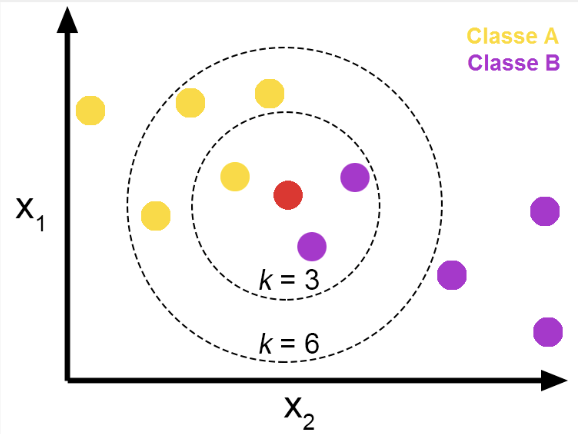

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

El objetivo del ejercicio actual es utilizar medidas físicas para predecir la edad del abulón, usando el algoritmo K-NN

1. Lo primero que debe hacer es eliminar la variable “Sex”.
2. Realice estadística descriptiva para el conjunto de datos entregados.
3. La variable objetivo es “Rings”, por lo que muestre la distribución de
estos datos e interprete.
4. Entregue la matriz de correlación ¿Qué variables pueden estar
correlacionadas?
5. Defina las distancias en los vectores de las variables independientes.
Para esto puede usar el atributo .values de Numpy
6. Guarde los datos en una matriz y úselo en este código:
distances = np.linalg.norm(X - new_data_point, axis=1)
7. Determine cuáles son los tres vecinos más cercanos.

la data esta alojada en
https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

#Cargado de data y limpieza

In [20]:
#cargamos la data
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

abalone = pd.read_csv(url, header=None)
abalone.columns = ["Sexo","Longitud","Diametro","Altura","Peso_total","Peso_desgranado","Peso_visceras","Peso_cascara","Anillos"]
abalone=abalone.drop("Sexo", axis=1)

abalone.info()
abalone

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Longitud         4177 non-null   float64
 1   Diametro         4177 non-null   float64
 2   Altura           4177 non-null   float64
 3   Peso_total       4177 non-null   float64
 4   Peso_desgranado  4177 non-null   float64
 5   Peso_visceras    4177 non-null   float64
 6   Peso_cascara     4177 non-null   float64
 7   Anillos          4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


,Longitud,Diametro,Altura,Peso_total,Peso_desgranado,Peso_visceras,Peso_cascara,Anillos
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


vemos que la data esta completa y sin variables tipo str

# Estadistica descriptiva

este grafico muestra en su diagonal el histograma de la variable y los diagramas de dispersion de las distintas variables

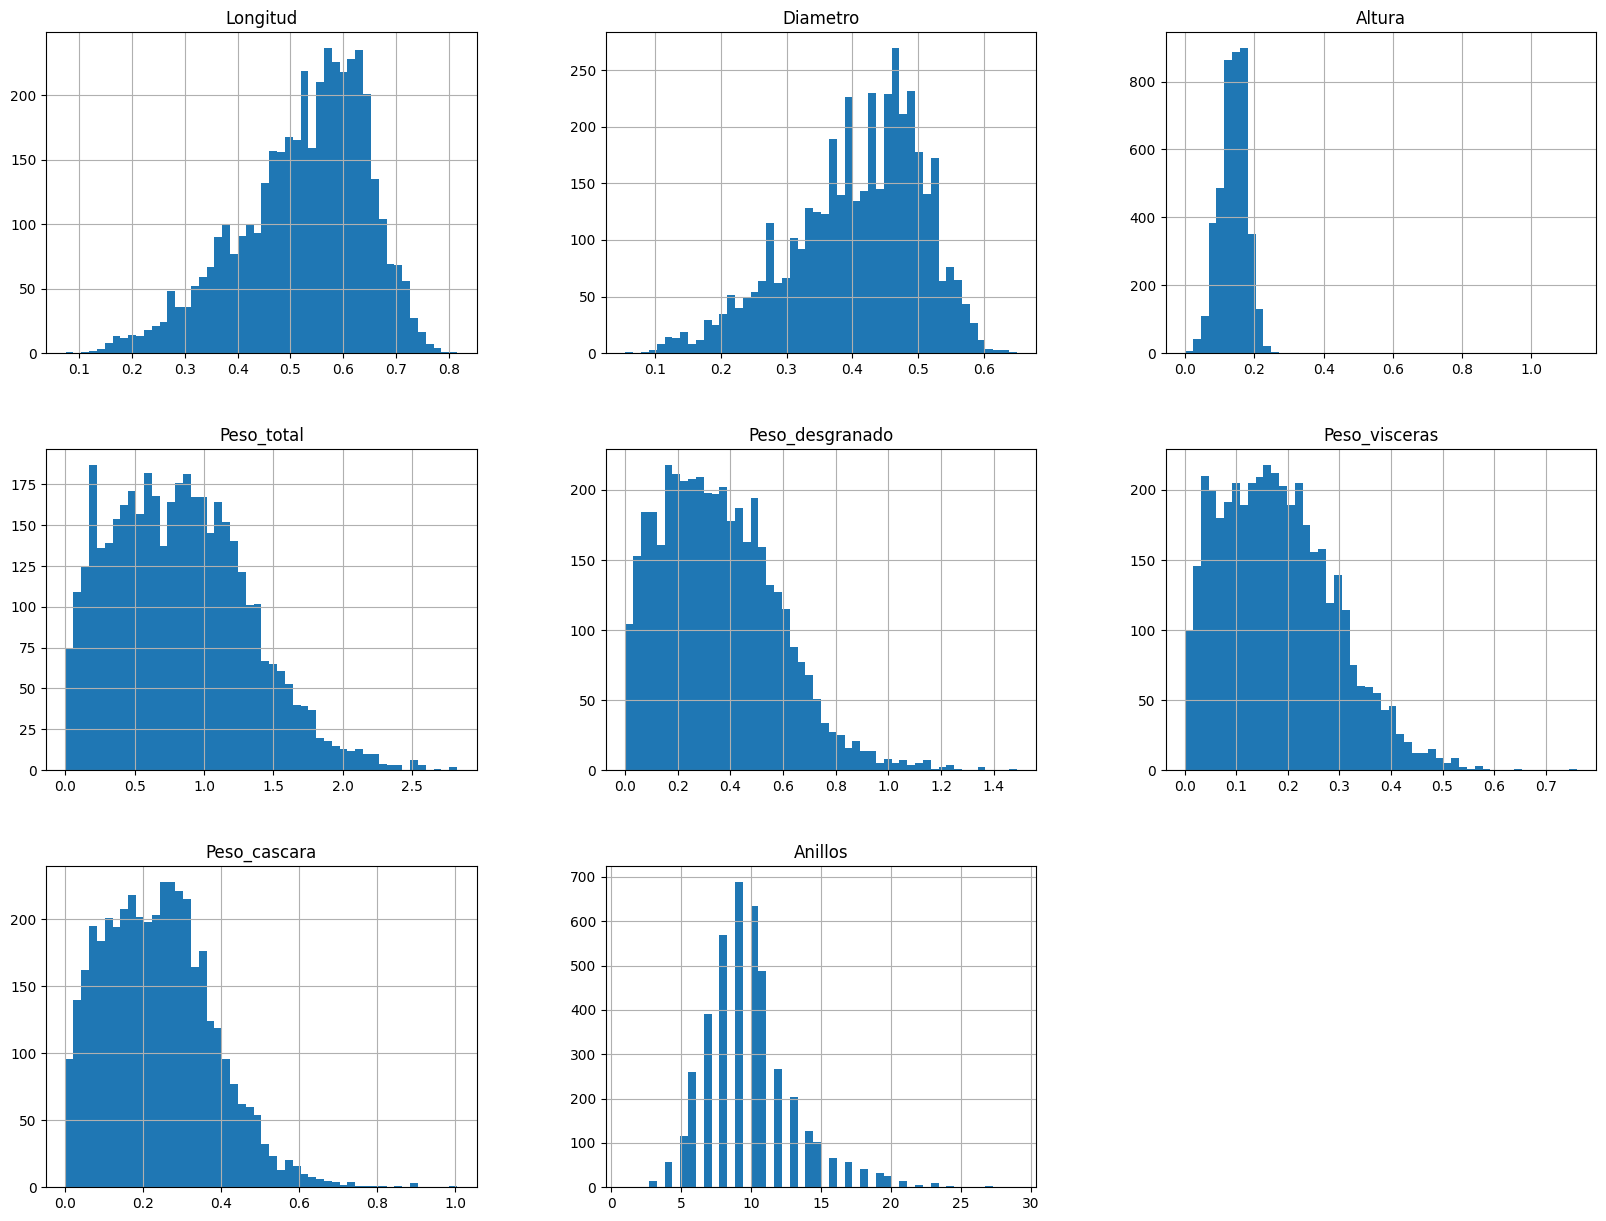

In [21]:
#histogramas
abalone.hist(bins=50,figsize=(20,15));

## 3



En los dos graficos se pueden apreciar que el histograma de 'anillos' es discontinuo.

como una interpretacion de estos datos se puede dar que en la tabla se clasificaron mas abalones con pocos anillos, dado que el histograma contiene mas datos con menores anillos, la mayoria de los abalones tiene entre 5 y 15 anillos

## 4

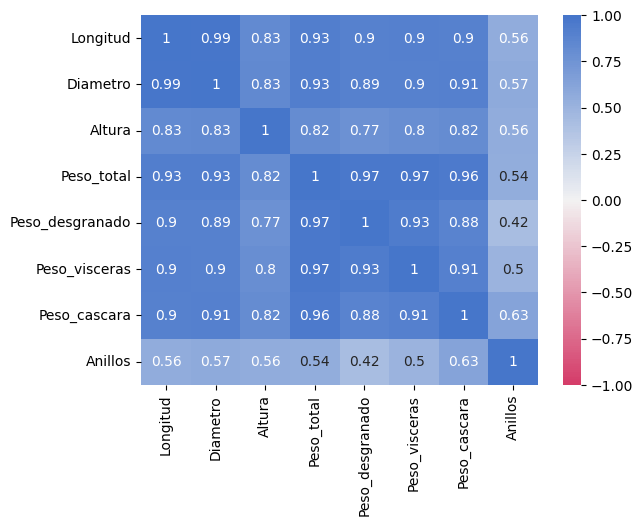

In [22]:
#correlaciones de los datos
corr_matrix = abalone.corr(method='pearson')

#graficamos la matriz de correlacion
sns.heatmap(corr_matrix,annot=True,linewidths=0,vmin=-1,vmax=1,cmap= sns.diverging_palette(0, 255, n=200));

de lo primero que nos damos cuenta es que las variables de longitud y diametro estan muy correlacionadas; y que la variable anillos tiene la menor correlacion con las demas variables, siendo la interseccion con 'peso_degradado' la con menor correlacion.Sin embargo la variable que queremos estudiar son los anillos por lo cual los que tiene mayor correlacion con esta variable son peso_cascara,longitud, diamentro, altura,peso_total

# aplicando K-NN

Como el objeto de estudio es los anillos de los abalones esta es la variable dependiente

## 5

In [23]:
#eliminamos la variable dependiente
X=abalone.drop("Anillos", axis=1)

X=X.values

y = abalone["Anillos"]
y = y.values

## 6

In [24]:
# Definir un nuevo punto de datos
new_data_point = [0, 0.55, 0.45, 0.1, 0.3, 0.14, 0.07]

# Calcular la distancia euclidiana entre X y el punto de datos
distances = np.linalg.norm(X - new_data_point, axis=1)
distances

array([0.74316368, 0.63059317, 0.86686129, ..., 1.30869267, 1.2621245 ,
       2.15391034])

## 7

In [25]:
nearest_neighbors = np.argsort(distances)[:3]
nearest_neighbors

array([1210, 3086, 2290])

In [26]:
nearest_neighbor_rings = y[nearest_neighbors]
nearest_neighbor_rings

array([6, 7, 6])

# KNN con scikit-learn

In [27]:
#muestra 80/20

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345)

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Para empezar, puedes evaluar el error de predicción en los datos de entrenamiento. Esto significa que utiliza los datos de entrenamiento para la predicción, por lo que sabe que el resultado debería ser relativamente bueno. Puede utilizar el siguiente código para obtener el RMSE:

In [28]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = np.sqrt(mse)
rmse

1.6538366794859511

En este código, calcula el RMSE usando el knn_model que ajustó en el bloque de código anterior. Calcule el RMSE en los datos de entrenamiento por ahora. Para obtener un resultado más realista, debe evaluar el rendimiento de los datos que no están incluidos en el modelo. Es por eso que mantuvo el conjunto de prueba separado por ahora. Puede evaluar los rendimientos predictivos en el conjunto de prueba con la misma función que antes:

In [29]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

Aquí evaluamos el error en los datos que el modelo aún no conocía. Este RMSE más realista es ligeramente más alto que antes. El RMSE mide el error promedio de la edad pronosticada, por lo que puede interpretarlo como que tiene, en promedio, un error de 1.65 años.

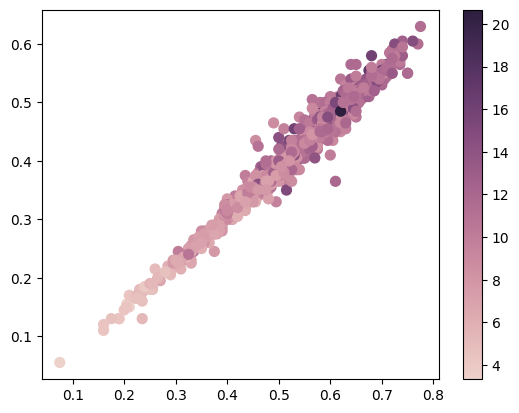

In [30]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

este grafico nos muestra donde cada punto es un abulón, con la longitud en el eje x y díametro en el eje y. Se puede apreciar que cuanto mas largo y grande sea el abulón mas edad tendra.

Para confirmar si esta tendencia existe en los datos reales de abulón, puede hacer lo mismo con los valores reales simplemente reemplazando la variable que se usa para c

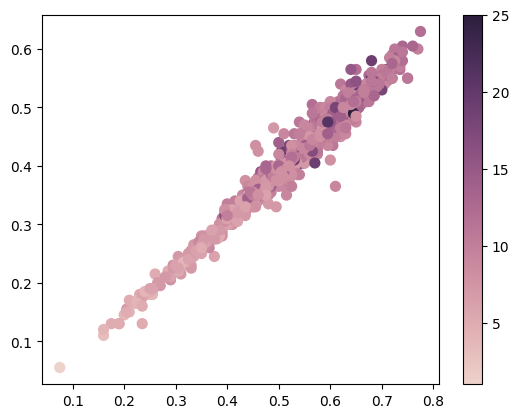

In [31]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c = y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()